## observational data

### Load files as an xarray dataset
### listing the data

In [1]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
# list avilable data in the bucket
# # path to the observation folder: bucket/forldername
s3DMS_Obs_data = s3.ls('/escience2022/Antoine/Satellite_Arctic_DMS')
s3DMS_Obs_data

['escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2003_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2004_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2005_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2006_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2007_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2008_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2009_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2010_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2011_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2012_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2013_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2014_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2016_8D_28km.nc',
 'esci

## Load one file as an xarray dataset

In [20]:
# path to the file: bucket/forlder/filename.nc
s3file1 = 's3://escience2022/Antoine/Satellite_Arctic_DMS/fdms_gsm_W97_S1998_8D_28km.nc'#fdms_L11_W97_CLIMdms_A2003_8D_28km.nc'
#dms_gsm_A2003_8D_28km.nc'#dmspt_gsm_A2003_8D_28km.nc'#dms_gsm_A2003_8D_28km.nc'
file = s3.open(s3file1)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:      (pixel: 96668, year: 1, period: 46)
Coordinates:
  * year         (year) float64 1.998e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (pixel) float64 ...
    latitude     (pixel) float64 ...
    startjulday  (period) float64 ...
    endjulday    (period) float64 ...
    fdms         (period, year, pixel) float64 ...

### fixing the coordinates to make them usable

In [21]:
ds=ds.assign_coords({
    "pixel": pd.MultiIndex.from_arrays([ds.latitude.values, ds.longitude.values.round()],names=["lat", "lon"])
                        }).unstack("pixel")
ds

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 361, year: 1, period: 46)
Coordinates:
  * lat          (lat) float64 45.12 45.38 45.62 45.88 ... 89.38 89.62 89.88
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * year         (year) float64 1.998e+03
Dimensions without coordinates: period
Data variables:
    longitude    (lat, lon) float64 -179.8 -178.8 -177.7 -176.6 ... nan nan nan
    latitude     (lat, lon) float64 45.12 45.12 45.12 45.12 ... nan nan nan nan
    startjulday  (period) float64 1.0 9.0 17.0 25.0 ... 337.0 345.0 353.0 361.0
    endjulday    (period) float64 8.0 16.0 24.0 32.0 ... 344.0 352.0 360.0 365.0
    fdms         (period, year, lat, lon) float64 2.106 2.044 1.439 ... nan nan

### plotting the data

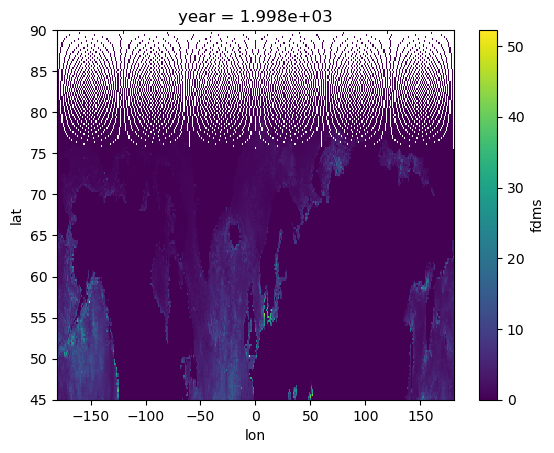

In [22]:
ds.fdms.isel(period=30,year=0).plot()

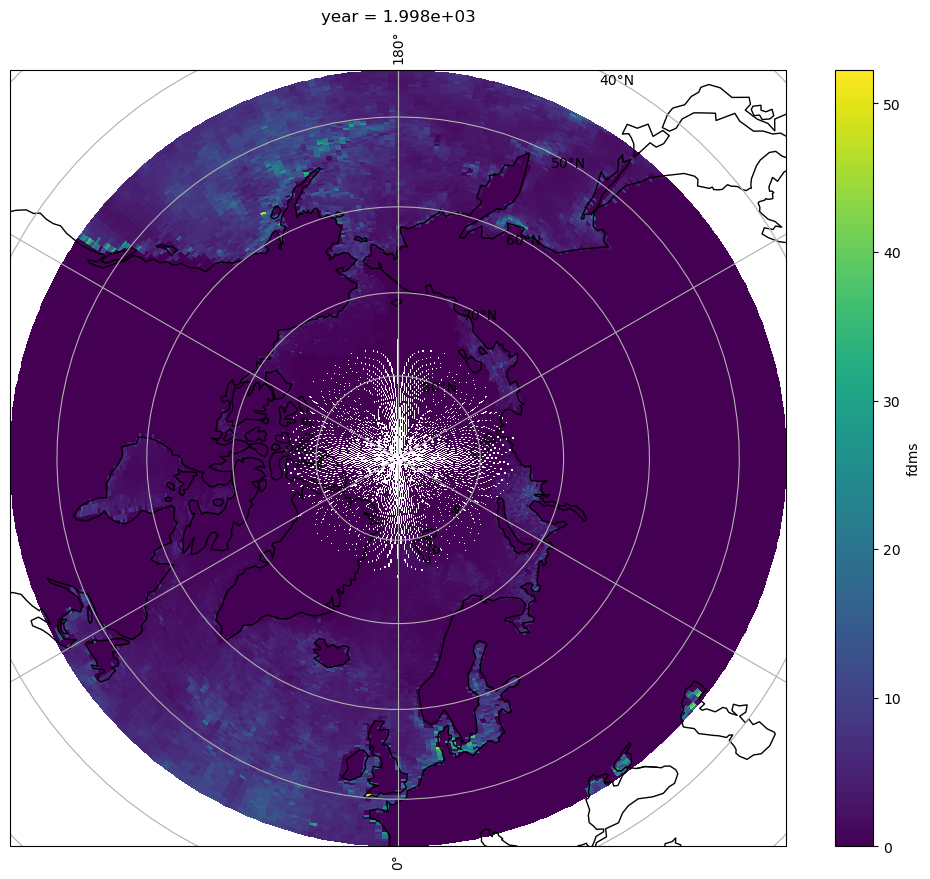

In [24]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())
ds.fdms.isel(period=30,year=0).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()